# OUTLIERS

Outliers are extreme values that fall a long way outside of the other observations. 

The process of identifying outlierhas many names in data mining and machine learning `outlier mining`, 
`outlier modeling` and `novality detection` and `anomaly detection`.

There are 3 different ways to detect outliers:-

1. Using Box Plot
2. Using IQR (Inter Quartile Range)
3. Using Z score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import kagglehub
from kagglehub import KaggleDatasetAdapter
import urllib.request
from PIL import Image
%matplotlib inline

# Setting the global font size for all plot elements (titles, labels, etc.)
plt.rcParams['font.size']=13
sns.set_style('darkgrid')


warnings.filterwarnings('ignore')    # This can be used for removing any future warnings
%matplotlib inline

The file`loan.csv` was taken from [here](https://www.kaggle.com/datasets/tanishaj225/loancsv)

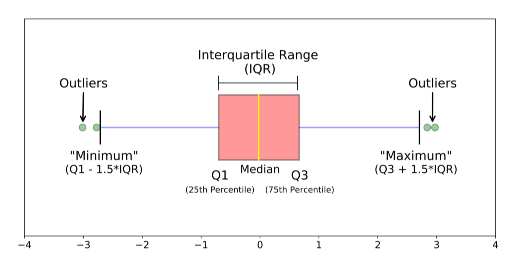

In [2]:
# Use direct image link
url = 'https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png'
headers = {'User-Agent': 'Mozilla/5.0'}
req = urllib.request.Request(url, headers=headers)

# Download image
with urllib.request.urlopen(req) as response, open('boxplot.png', 'wb') as f1:
    f1.write(response.read())

# Open and display
img = Image.open('boxplot.png')
plt.imshow(img)
plt.axis('off')
plt.show()

As we can see in the boxplot above:

* The green dots above the maximum and below the minimum represent outliers — values that lie far outside the normal range of the data.

* The pink box represents the interquartile range (IQR), where most of the data lies.

* The yellow line inside the box shows the median, which is the middle value of the dataset.

Let's look at the data we have been working on i.e. `loan.csv`

In [3]:
# Set the path to the file you'd like to load
file_path = "loan.csv"  # file inside tanishaj225/loancsv dataset

# Load dataset into pandas DataFrame
loan_df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "tanishaj225/loancsv",   # dataset slug
    path=file_path           # specify file to load
)

In [4]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Let’s work with the `ApplicantIncome` and `CoapplicantIncome` columns.

Before proceeding, we should first check for any **NaN** (missing) values.

* If missing values are present, we can handle them by using

  * `KNNImputer` (which predicts missing values based on nearest neighbors)

  * `SimpleImputer` (which replaces them with a basic statistic like mean, median, or mode).

In [5]:
loan_df.ApplicantIncome.isna().sum()

np.int64(0)

In [6]:
loan_df.CoapplicantIncome.isna().sum()

np.int64(0)

Well it looks like there are no missing values in those columns but there are multiple 0's present.

### So should you replace 0 values?

It depends on the context of the column:

* `ApplicantIncome / CoapplicantIncome`

    * Logically, income cannot be 0 (unless it’s a very rare case where the person has no income).

    * In most datasets (like loan datasets), a `0` in income usually means missing or wrongly entered data → so yes, you should consider replacing it.
 
### How to replace?

You treat those 0s similar to missing values (`NaN`), because they don’t make sense in the context.

Step 1: Remove all the 0's with the **NaN** value

Step 2: Then apply SimpleImputer or KNNImputer to fill those **NaN** values with either their nearest neighbour or replace them with a basic statistic         like mean, median, or mode

In [7]:
# Step 1: Replace unrealistic 0 values with NaN
# (Alternatively, you could select all float64 columns using 
# .select_dtypes(include='float64').columns and handle them together)

loan_df.ApplicantIncome.replace(0, np.nan, inplace=True)
loan_df.CoapplicantIncome.replace(0, np.nan, inplace=True)

In [8]:
# Let's check
loan_df.ApplicantIncome.isna().sum()

np.int64(0)

In [9]:
loan_df.CoapplicantIncome.isna().sum()

np.int64(273)

In [10]:
from sklearn.impute import KNNImputer

In [11]:
imputer = KNNImputer(n_neighbors=5)
loan_df[['ApplicantIncome', 'CoapplicantIncome']] = imputer.fit_transform(loan_df[['ApplicantIncome', 'CoapplicantIncome']])

In [12]:
loan_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,3422.4,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,2687.8,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,3688.8,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006.0,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841.0,10968.0,349.0,360.0,1.0,Semiurban,N


As you can see, the values that were previously 0 were first converted to NaN, and then replaced with values based on their nearest neighbours.

Before moving on to the next topic let's just fill up the remaining NaN values in the data set

In [13]:
loan_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
for i in loan_df.select_dtypes(include='object').columns:
    loan_df[i].fillna(loan_df[i].mode()[0], inplace=True)

In [15]:
loan_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
fl = loan_df[loan_df.select_dtypes(include='float64').columns]

In [17]:
# Just Replacing any 0 values with NaN
fl.replace(0, np.nan, inplace=True)

In [18]:
fl.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [19]:
fl.isna().sum()

ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History       139
dtype: int64

In [20]:
imputer = KNNImputer(n_neighbors=5)
loan_df[fl.columns] = imputer.fit_transform(fl)

In [21]:
loan_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Using IQR (Inter Quartile Range)